In [165]:
# Standard Libraries
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt

import seaborn as sns

# Data-Prep
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Buidling and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

In [166]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [168]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [169]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [170]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [171]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [172]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [173]:
df=data

In [174]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [175]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

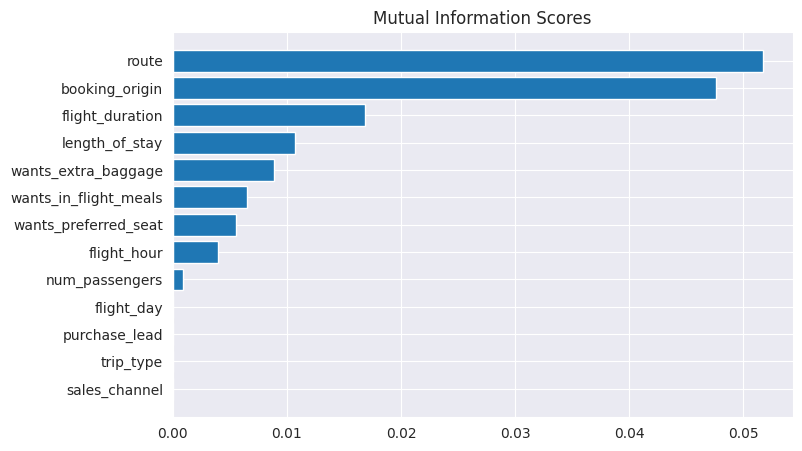

In [176]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [177]:
data_categorical = data.select_dtypes(include="object")
data_numerical = data.select_dtypes(exclude="object")

In [178]:
data_categorical.head()

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India


In [179]:
for col in data_categorical:
    print(data_categorical[col].value_counts())
    print("\n")

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64




In [180]:
data_categorical.columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [181]:
columns = ['sales_channel', 'trip_type', 'route', 'booking_origin']
for value in columns:
    data_categorical=pd.get_dummies(data_categorical, columns=[value],drop_first=True)

In [182]:
data_categorical.shape

(50000, 904)

In [183]:
data_categorical.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [184]:
data_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


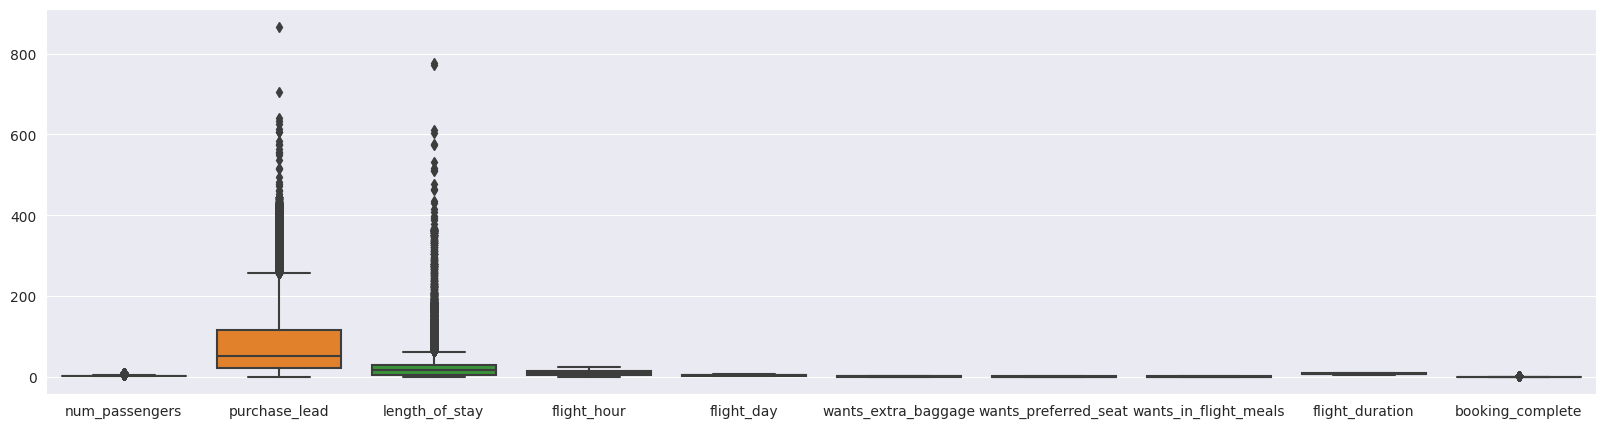

In [185]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

In [186]:
data_numerical.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [187]:
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']
for feature in column_list:
    Q1= data_numerical[feature].quantile(0.25)
    Q3 =data_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1


    lower_limit = Q1 - 1.5 * IQR

    upper_limit = Q3 + 1.5 * IQR


    median = data_numerical[feature].median()

    data_numerical[feature] = np.where(data_numerical[feature]< lower_limit, median,data_numerical[feature])
    data_numerical[feature] = np.where(data_numerical[feature]> upper_limit, median,data_numerical[feature])

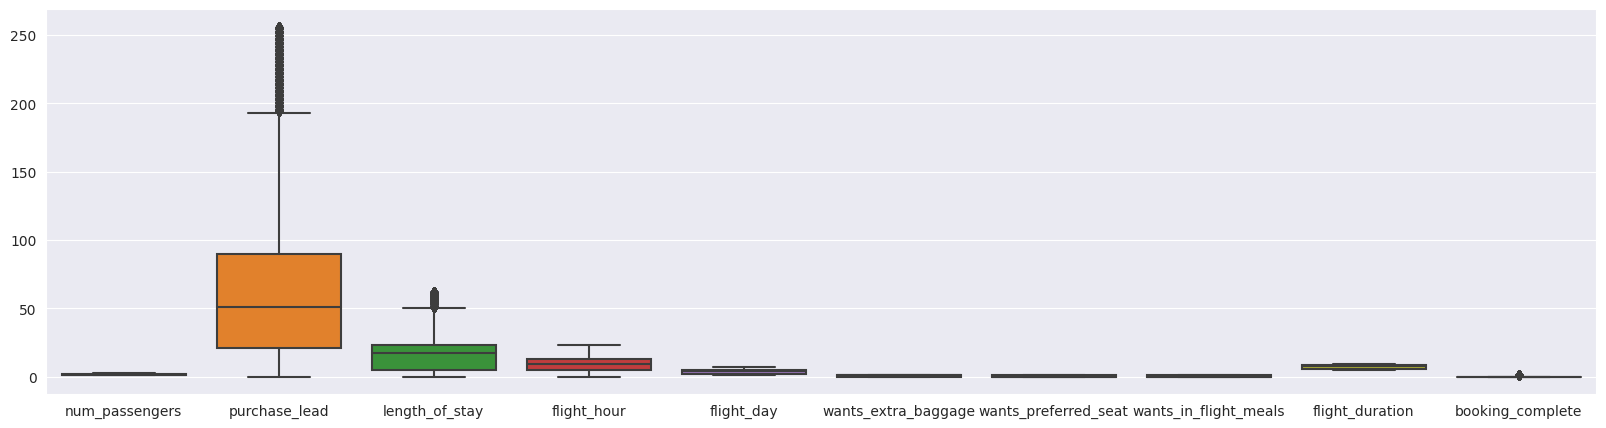

In [188]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

In [189]:
df = pd.concat([data_categorical,data_numerical], axis =1)

In [190]:
df.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,...,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,False,False,True,False,False,False,False,False,False,False,...,2.0,51.0,19.0,7.0,6,1.0,0.0,0.0,5.52,0
1,False,False,True,False,False,False,False,False,False,False,...,1.0,112.0,20.0,3.0,6,0.0,0.0,0.0,5.52,0
2,False,False,True,False,False,False,False,False,False,False,...,2.0,243.0,22.0,17.0,3,1.0,1.0,0.0,5.52,0
3,False,False,True,False,False,False,False,False,False,False,...,1.0,96.0,31.0,4.0,6,0.0,0.0,1.0,5.52,0
4,False,False,True,False,False,False,False,False,False,False,...,2.0,68.0,22.0,15.0,3,1.0,0.0,1.0,5.52,0


In [191]:
X = df.drop(["booking_complete"] , axis=1)
y = df["booking_complete"]

In [192]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [193]:
X_scaled = pd.DataFrame(X_scaled)

In [194]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,903,904,905,906,907,908,909,910,911,912
0,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,-0.645168,-0.731702,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368
49996,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.751282,-0.731702,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,-0.695041,-0.731702,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,-0.844661,-0.731702,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368


In [195]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [196]:
y.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [197]:
print(X.shape)
print(y.shape)

(50000, 913)
(50000,)


In [198]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 913)
(85044,)


In [199]:
x_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,903,904,905,906,907,908,909,910,911,912
0,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,-0.246182,0.231165,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.767907,0.305232,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,2.945705,0.453365,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,-0.630179,0.501916,1.119966,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,-0.355785,-0.08832,0.100808,-0.004472,-0.006325,-0.037443,-0.01265,-0.011833,-0.237983,-0.010955,...,-0.088435,1.056055,0.036433,0.453365,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175


In [200]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

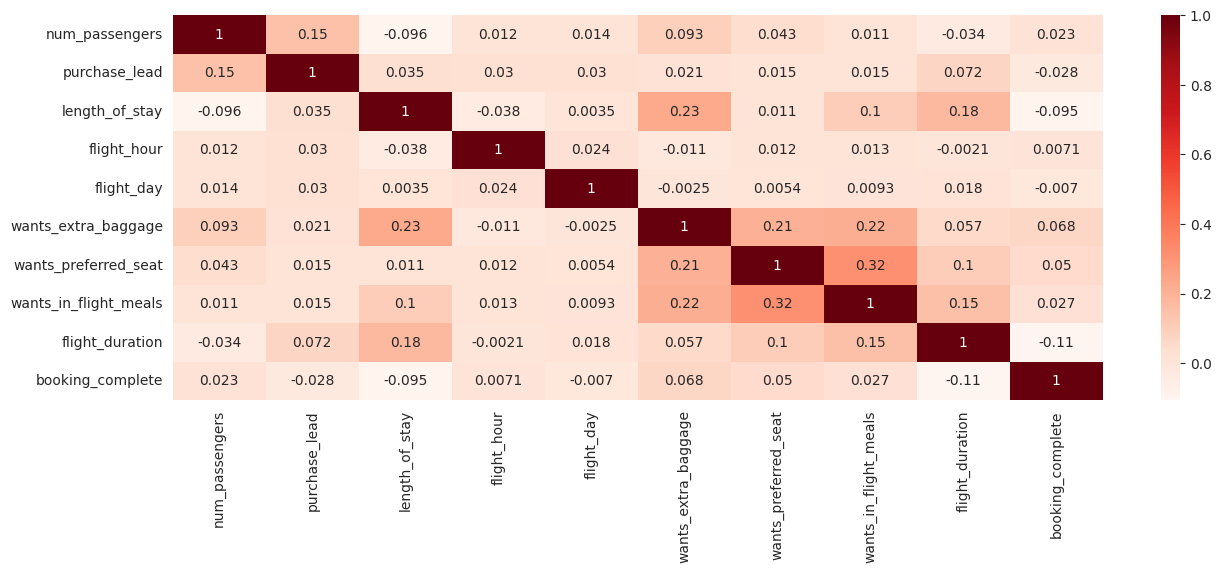

In [201]:
plt.figure(figsize=(15,5))
sns.heatmap(data_numerical.corr() , annot=True, cmap="Reds")
plt.show()

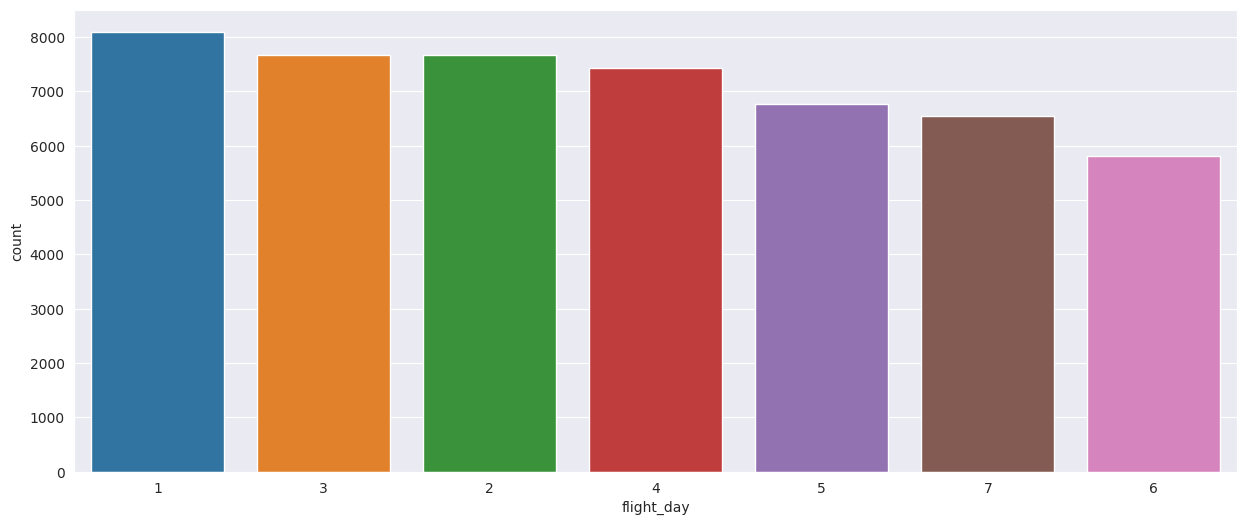

In [202]:
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=data, order=data["flight_day"].value_counts().index)
plt.show()

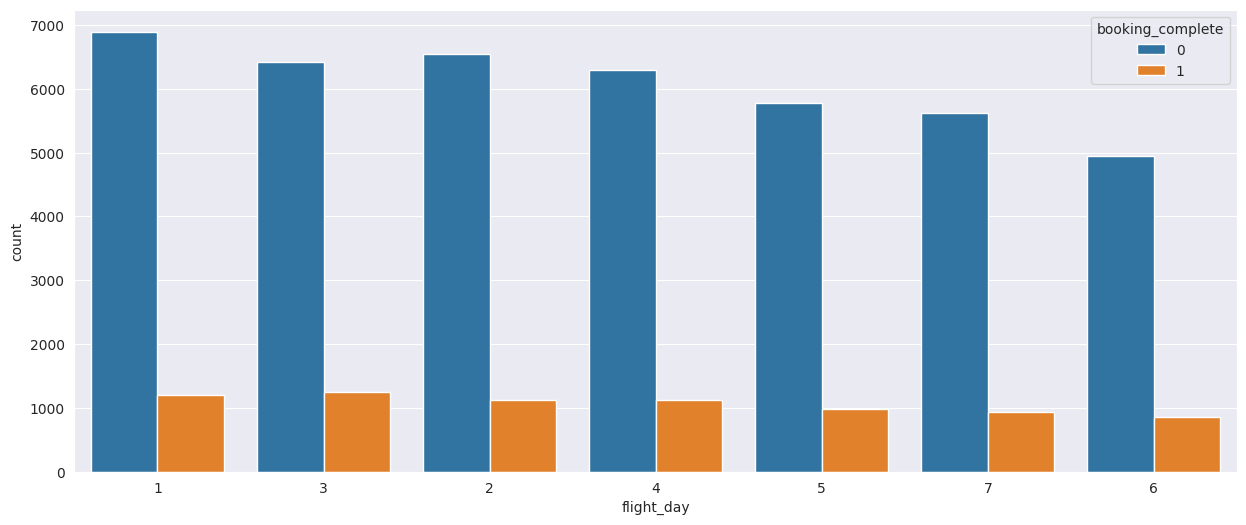

In [203]:
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day",hue = "booking_complete", data=data, order=data["flight_day"].value_counts().index)
plt.show()

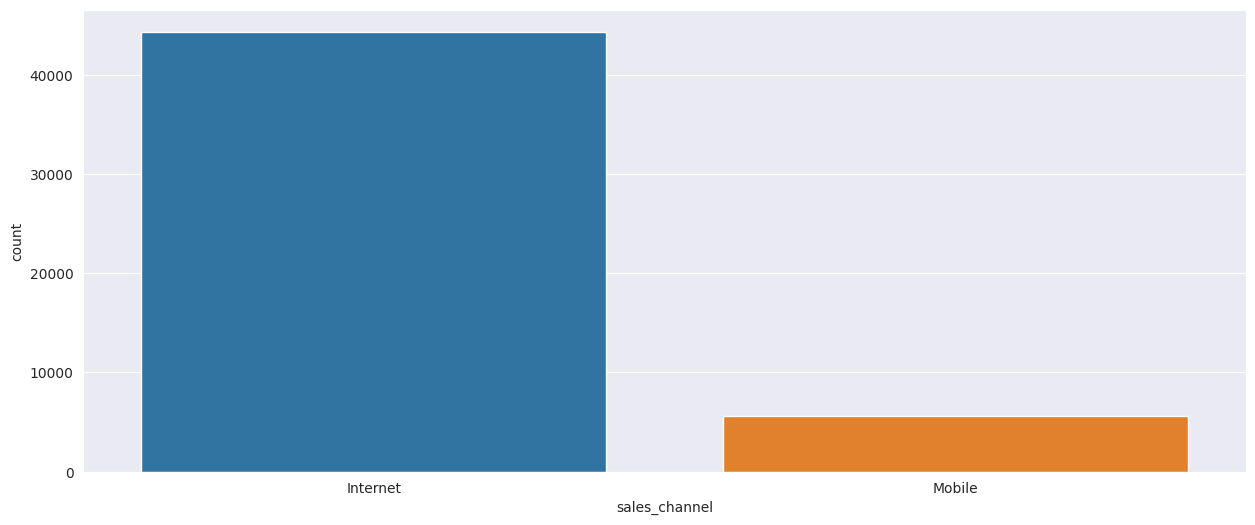

In [204]:
plt.figure(figsize=(15,6))
sns.countplot(x = "sales_channel", data=data, order=data["sales_channel"].value_counts().index)
plt.show()

In [205]:
data["booking_origin"].value_counts(ascending=False)

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

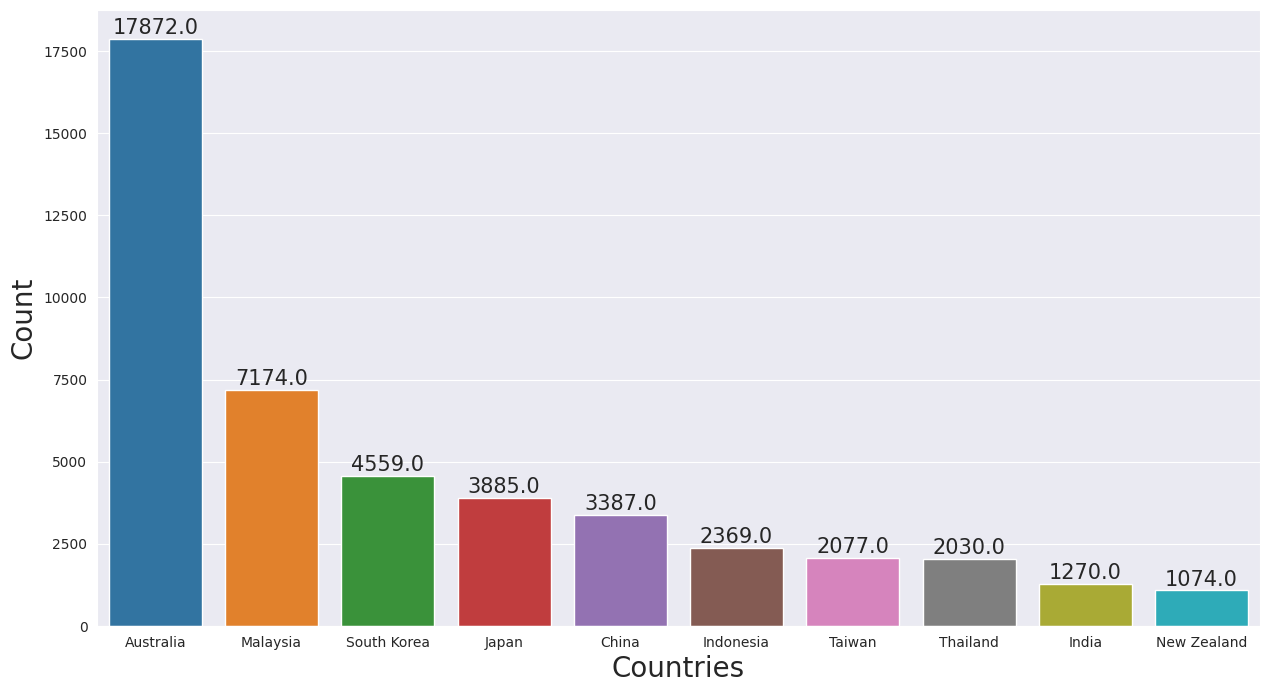

In [206]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

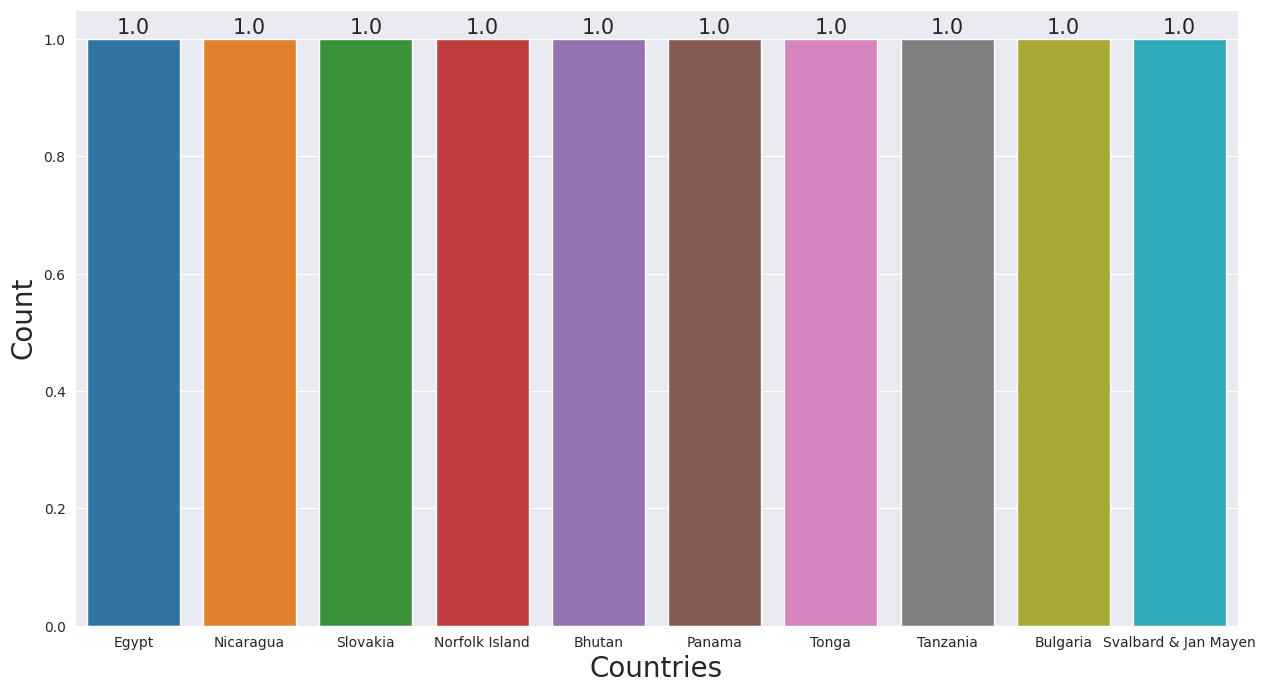

In [207]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x="booking_origin",  data=data ,order=data.booking_origin.value_counts().iloc[-10:].index)
plt.xlabel("Countries",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

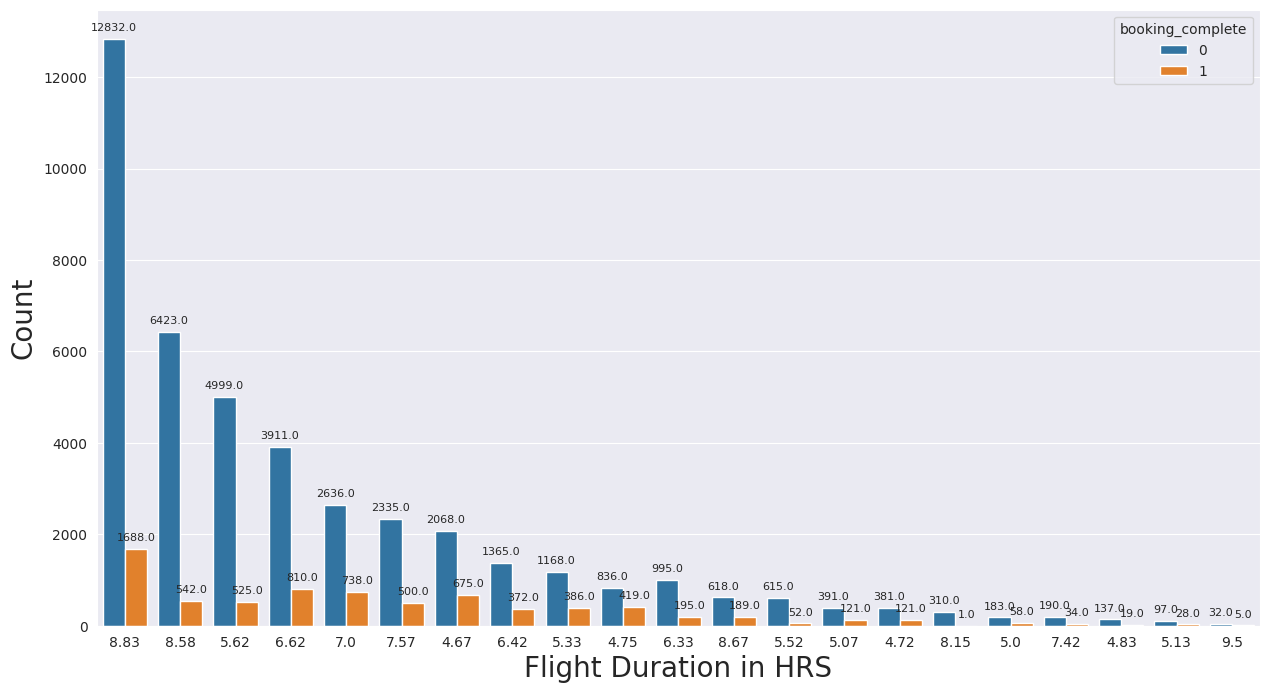

In [227]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x="flight_duration", hue="booking_complete" , data=data ,order=data.flight_duration.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')
plt.savefig("Flight Duration in HRS")

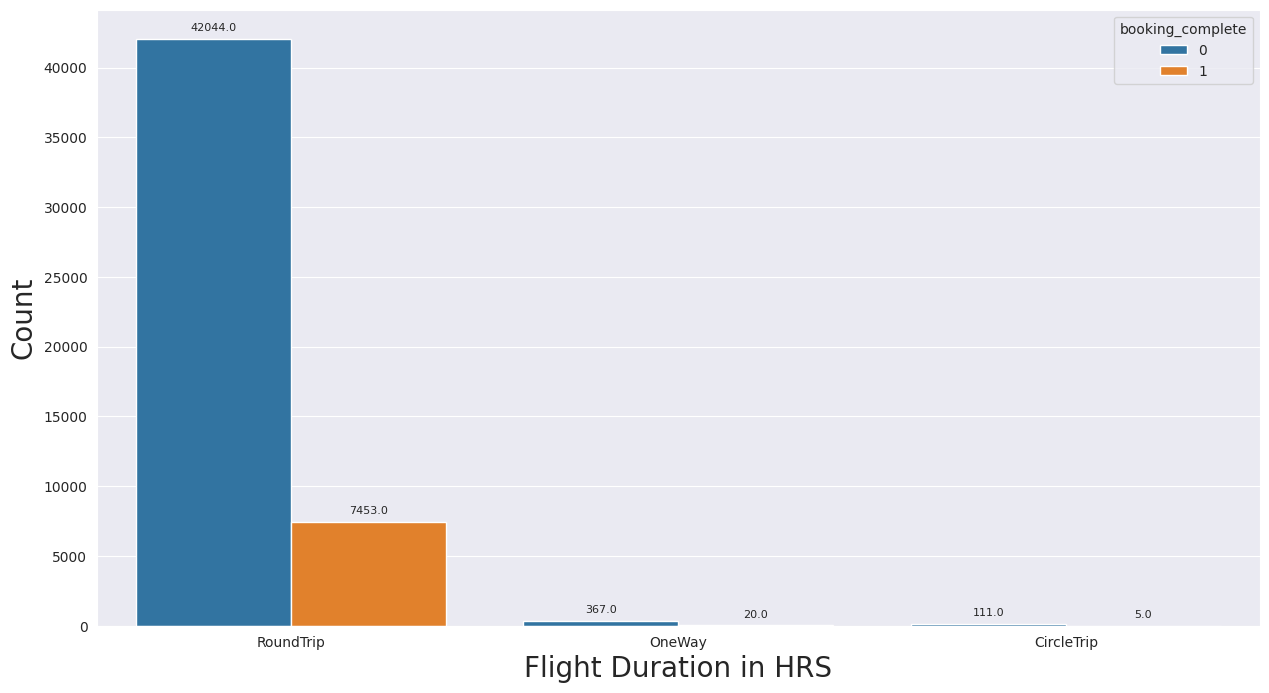

In [209]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x="trip_type", hue="booking_complete" , data=data ,order=data.trip_type.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')

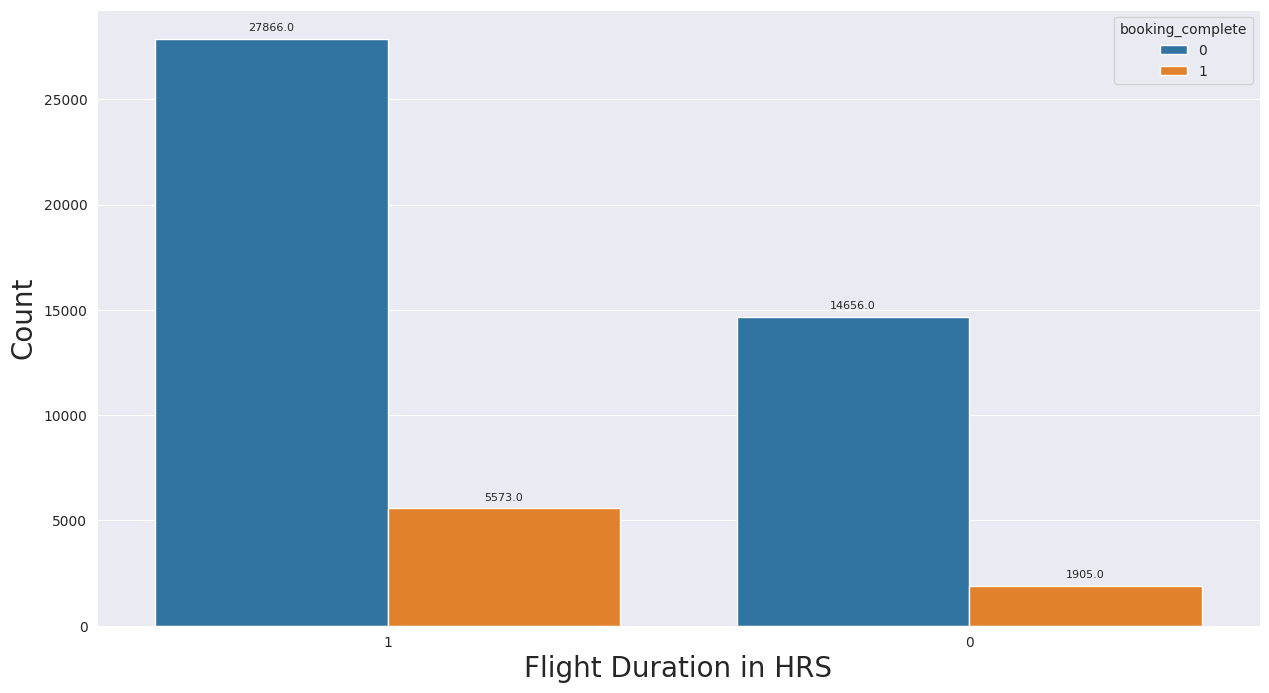

In [210]:
plt.figure(figsize=(15,8))
plots = sns.countplot(x="wants_extra_baggage", hue="booking_complete" , data=data ,order=data.wants_extra_baggage.value_counts().index)#.iloc[-10:].index)
plt.xlabel("Flight Duration in HRS",fontsize= 20)
plt.ylabel("Count", fontsize= 20)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',size=8, xytext=(0, 8),textcoords='offset points')

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.25,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(63783, 913)
(21261, 913)
(63783,)
(21261,)


In [212]:
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)

RandomForestClassifier()

In [213]:
y_pred_rf_train = rforest.predict(x_train)
y_pred_rf_test = rforest.predict(x_test)

In [214]:
print(confusion_matrix(y_train, y_pred_rf_train))
print("\n")
print(confusion_matrix(y_test, y_pred_rf_test))

[[31885     7]
 [    1 31890]]


[[9841  789]
 [ 981 9650]]


In [215]:
print(classification_report(y_train, y_pred_rf_train))
print("\n")
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31892
           1       1.00      1.00      1.00     31891

    accuracy                           1.00     63783
   macro avg       1.00      1.00      1.00     63783
weighted avg       1.00      1.00      1.00     63783



              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10630
           1       0.92      0.91      0.92     10631

    accuracy                           0.92     21261
   macro avg       0.92      0.92      0.92     21261
weighted avg       0.92      0.92      0.92     21261



In [216]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

0.9998745747299437


0.9167489770001411


In [217]:
accuracy = cross_val_score(rforest, x_train, y_train, cv=10)

In [218]:
accuracy

array([0.91424988, 0.90970372, 0.91785546, 0.91125745, 0.91455002,
       0.91251176, 0.92035121, 0.91627469, 0.91376607, 0.91360928])

In [224]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_rf_train})

In [225]:
print(df)

       Actual  Predicted
1261        0          0
42956       0          0
26565       0          0
19609       0          0
74571       1          1
...       ...        ...
5695        0          0
73542       1          1
83281       1          1
83467       1          1
45919       0          0

[63783 rows x 2 columns]
